# Final Project Submission
Please fill out:

Student name: Betshua Kerubo

Student pace: full time

Scheduled project review date/time: 26/05/2023

Instructor name:

Blog post URL:

# Business understanding
The movie industry is a highly differentiated context where production studios compete in non-price product attributes, which influences the box office results of a motion picture. Because of the short life cycle and the constant entrance of new competitive products, temporal decisions play a crucial role. Time series of the number of movies on release and the sum of the box office results of the ten top motion pictures (ranked by box office result for that week) present a counterphased seasonality in the movie market.Although the film industry is high risk, sequels and films adapted from novels or comic books can be financially successful because they can capitalise on the established brands of their parent work.The gross revenue of a movie in the box office has been a concern of the movie industry hence the use of the [bom movie dataset](https://www.boxofficemojo.com/)

In the film industry, the ability to predict a movie’s box-office revenues before its theatrical release can decrease its financial risk. However, accurate predictions are not easily obtained. The complex relationship between movie-related data and movie box-office revenues, plus the increasing volume of data in online movie databases, pose challenges for their effective analysis. This analysis will take into considerations two datasets to try and understand the types of films that are currently doing the best at the box office in order to decide what type of films microsoft should create.

# Step 1: Data Cleaning

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bom_movie_df= pd.read_csv('bom.movie_gross.csv') ##loading our bom.movie_gross.csv data into a dataframe
bom_movie_df.head() ##viewig the first 5 rows of the dataframe

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
bom_movie_df.tail() ## viewing the last 5 rows of the dataframe

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


From these tables , we can tell that this dataframe has missing values.Let us take a look at the information about the dataframe to know which columns has missing values.

In [4]:
bom_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


This dataframe has 5 columns in which the title column,studio columnand foreign gross column contains object type data,the domestic gross column has data of data type,float, and the year column contains data of data type ,integer. In this dataframe,bom_movie_df,the column studio,domestic_gross and foreign_gross have missing values. Let's check how many missing values each column has.

In [5]:
bom_movie_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Studio column has 5 missing values, domestic_gross column has 28 missing values, foreign_gross column has 1350 missing values.

In [6]:
bom_movie_df.shape #to check the shape of the dataframe

(3387, 5)

The dataframe has 3387 rows and 5 columns. The studio column has 5 missing values , thus we can deal with them by replacing them with the mode of the column since the column is categorical. Let's find the mode of that column.

In [7]:
bom_movie_df['studio'].value_counts()

IFC           166
Uni.          147
WB            140
Fox           136
Magn.         136
             ... 
FOR             1
HC              1
Arth.           1
CineGalaxy      1
ParC            1
Name: studio, Length: 257, dtype: int64

The mode of this data is IFC thus we shall replace the missing values with IFC.

In [8]:
bom_movie_df['studio'].fillna(value='IFC',inplace=True)

Let's check if this column now has any missing values.

In [9]:
bom_movie_df['studio'].isna().sum()

0

The studio column no longer has missing values.The next column is domestic_gross which has 28 missing values. We can replace them with the median of that column since this column has numerical values. Before we replace, let's examine the distribution of the domestic_gross column.

C:\Users\dell\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\dell\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


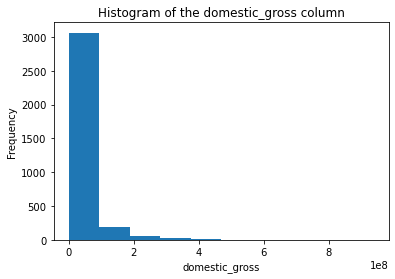

In [10]:
fig,ax=plt.subplots()
ax.hist(bom_movie_df['domestic_gross'],bins=10)
ax.set_xlabel('domestic_gross')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of the domestic_gross column')
plt.show;

Domestic_gross column is positively skewed showing that the mean is greater than the median and also it has some outliers.Let's replace the missing values with the median instead of the mean because the median is not as affected by the outliers like the mean.

In [11]:
bom_movie_df['domestic_gross'].fillna(bom_movie_df['domestic_gross'].median(),inplace=True)

Now let's check if the column still has missing values.

In [12]:
bom_movie_df['domestic_gross'].isna().sum()

0

The domestic gross column no longer has missing values.The last column is foreign_gross. First, let's check what percentage the missing values constitues of the entire foreign_gross column.

In [14]:
na_values = (bom_movie_df['foreign_gross'].isna().sum() / len(bom_movie_df['foreign_gross']))*100
na_values
print("The missing values constitutes" ,{na_values} ,"of the foreign_gross column".format(na_values))

The missing values constitutes {39.85828166519043} of the foreign_gross column


The missing values constitues 39.9% of the entire column. Dropping the entire column is not the best option because it will result in loosing 60.1% of data from the column. We can just drop the rows that have missing values.

In [15]:
bom_movie_df.dropna(subset=['foreign_gross'],inplace=True)

Let's confirm that our dataframe doesn't have any missing values.

In [16]:
bom_movie_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [17]:
bom_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2037 non-null   object 
 1   studio          2037 non-null   object 
 2   domestic_gross  2037 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            2037 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 95.5+ KB


In [18]:
bom_movie_df['foreign_gross'].value_counts()

1200000      23
1100000      14
1900000      12
4200000      12
1300000      11
             ..
82600000      1
15400000      1
106000        1
119700000     1
216000        1
Name: foreign_gross, Length: 1204, dtype: int64

The column, foreign gross, contains numerical values yet the column is of data type object. Clearly that is not right. So let's convert the column to type float.

In [19]:
bom_movie_df['foreign_gross'] = [float(str(i).replace(",", "")) for i in bom_movie_df['foreign_gross']]

In [20]:
bom_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2037 non-null   object 
 1   studio          2037 non-null   object 
 2   domestic_gross  2037 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            2037 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 95.5+ KB


The foreign gross column is now of type float , which makes more sense since it contains numerical data.The data now doesn't have any missing values. We can now check if it has any duplicates.

In [21]:
bom_movie_df.duplicated().value_counts()

False    2037
dtype: int64

This dataset doesn't have any duplicates. Let's check if the dataset has any placeholder values.

In [22]:
for col in bom_movie_df.columns:
    print(col, '\n', bom_movie_df[col].value_counts(normalize=True).head(), '\n\n')

title 
 Ocean's 8                       0.000491
The Maze Runner                 0.000491
Faster                          0.000491
Harry Brown                     0.000491
Independence Day: Resurgence    0.000491
Name: title, dtype: float64 


studio 
 Uni.    0.070692
Fox     0.065783
WB      0.063819
Sony    0.052037
BV      0.051055
Name: studio, dtype: float64 


domestic_gross 
 1400000.0    0.018655
1500000.0    0.006873
1000000.0    0.006382
1300000.0    0.005891
1100000.0    0.005400
Name: domestic_gross, dtype: float64 


foreign_gross 
 1200000.0    0.011291
1100000.0    0.006873
1900000.0    0.005891
4200000.0    0.005891
2500000.0    0.005400
Name: foreign_gross, dtype: float64 


year 
 2010    0.154148
2011    0.143839
2012    0.122730
2014    0.116838
2013    0.100638
Name: year, dtype: float64 




In [23]:
for col in bom_movie_df.columns:
    print(col, '\n', bom_movie_df[col].value_counts(normalize=True).tail(), '\n\n')

title 
 Khumba                   0.000491
Mubarakan                0.000491
The Dark Knight Rises    0.000491
To Die Like a Man        0.000491
Creed II                 0.000491
Name: title, dtype: float64 


studio 
 AGF         0.000491
Aviron      0.000491
Outs        0.000491
Da.         0.000491
EpicPics    0.000491
Name: studio, dtype: float64 


domestic_gross 
 148300000.0    0.000491
32299.0        0.000491
675000.0       0.000491
106600000.0    0.000491
11200000.0     0.000491
Name: domestic_gross, dtype: float64 


foreign_gross 
 44000000.0     0.000491
204400000.0    0.000491
47200000.0     0.000491
74000.0        0.000491
128000.0       0.000491
Name: foreign_gross, dtype: float64 


year 
 2013    0.100638
2016    0.095729
2015    0.093765
2017    0.087383
2018    0.084929
Name: year, dtype: float64 




This dataset doesn't seem to have any placeholder values. To understand the structure, distribution, and relationship of data variables in the dataset, let's do some exploratory data analysis.

# Step 2: Data Analysis

Let's begin with descriptive statistics on the numerical columns.

In [24]:
bom_movie_df.describe()

,domestic_gross,foreign_gross,year
count,2.037000e+03,2.037000e+03,2037.000000
mean,4.634668e+07,7.487281e+07,2013.492882
std,8.121024e+07,1.374106e+08,2.592412
min,4.000000e+02,6.000000e+02,2010.000000
25%,6.970000e+05,3.700000e+06,2011.000000
50%,1.550000e+07,1.870000e+07,2013.000000
75%,5.550000e+07,7.490000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


The numerical columns are; domestic_gross, foreign_gross and year. The count represents the number of non empty values in the column. Since the dataset doesn't have any missing values , the count is 2037,the number of rows the dataframe has. Let's focus on foreign gross and domestic gross. The mean of the columns are 46,346,680 and 74,872,800 for domestic gross and foreign gross respectively. The standard deviation is 81,210,240 and 13,741,060 for domestic gross and foreign gross respectively.Their standard deviation is quite large ,implyimg that in both columns, the data values are widely dispersed about their mean, that is, they are further away from the mean. The minimum values for domestic gross and foreign gross respectively are; 400 and 600 while the maximum values for domestic gross and foreign gross respectively are; 936,700,000 and 960,500,000. The 25% percentile for domestic gross and foreign gross respectively is;6,970,000 and 3,700,000 while the 50% percentile,which is the median, for domestic gross and foreign gross respectively is;15,500,000 and 18,700,000 and the 75% percentile for domestic gross and foreign gross respectively is;55,500,000 and 74,900,000.

On comparing the mean and the median in both columns;in the domestic gross column, the mean is higher than the median implying that the data is skewed to the right,that is, it is positively skewed. In the foreign gross column, the mean is also higher than the median, implying that it is also positively skewed.

Let's visualize the distribution of these two columns.

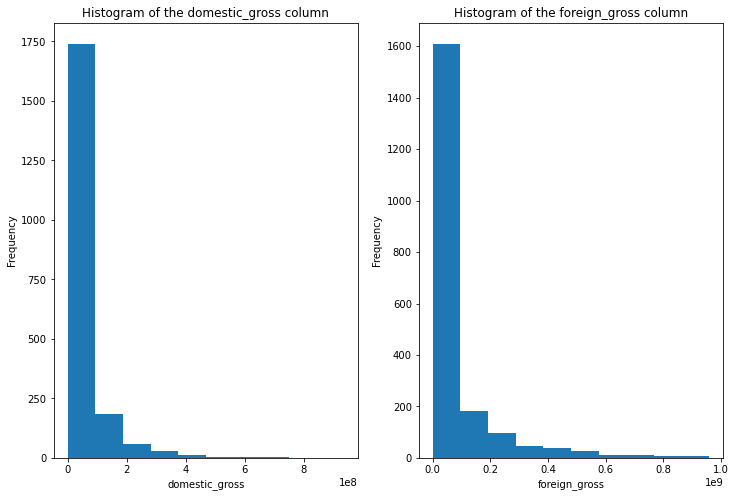

In [25]:
fig,(ax1,ax2)=plt.subplots(figsize=(12,8),nrows=1,ncols=2)
ax1.hist(bom_movie_df['domestic_gross'],bins=10)
ax1.set_xlabel('domestic_gross')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of the domestic_gross column')

ax2.hist(bom_movie_df['foreign_gross'],bins=10)
ax2.set_xlabel('foreign_gross')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of the foreign_gross column')

plt.show;

The histogram shows that the data in both columns is positively skewed. Let's check if these two variables are correlated.

In [26]:
# calculate the correlation matrix
corr_matrix = bom_movie_df.corr()

# print the correlation matrix
print(corr_matrix)

                domestic_gross  foreign_gross      year
domestic_gross        1.000000       0.768451  0.122727
foreign_gross         0.768451       1.000000  0.145653
year                  0.122727       0.145653  1.000000


From this correlation matrix, we can tell that the correlation between domestic gross and foreign gross is 0.768451 which indicates that the two variables have a strong relationship and that they are positively correlated ,that is, increase in domestic gross leads to increase in foreign gross and vice versa. We can visualize this using a scatter plot.

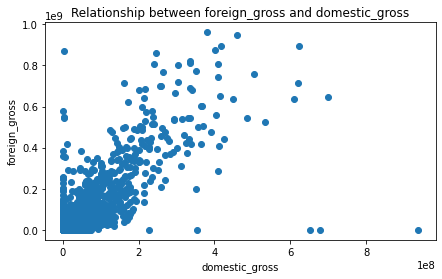

In [27]:
fig, ax=plt.subplots(figsize=(7,4))
ax.scatter(bom_movie_df['domestic_gross'],bom_movie_df['foreign_gross'])
ax.set_xlabel('domestic_gross')
ax.set_ylabel('foreign_gross')
ax.set_title('Relationship between foreign_gross and domestic_gross')
plt.show;

From this scatter plot, we can tell that foreign_gross and domestic_gross have a very strong relationship , they have a highly positive correlation. From the correlation matrix above, the correlation between foreign_gross and year is 0.145653 which is a positive correlation, though not strong, implying that as years go by, the foreign gross increases. The correlation between year and domestic gross is 0.122727 ,which is a positive correlation, implying that as years go by the domestic gross increases.

To further understand our data, lets find out the top movies from this data.

In [28]:
bom_movie_df = bom_movie_df.sort_values(['foreign_gross'], ascending=False)

In [29]:
bom_movie_df.head()

,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018
1127,Frozen,BV,400700000.0,875700000.0,2013


Sorting the dataframe using the foreign gross, the top 5 movies are;Harry Potter and the Deathly Hallows Part 2, Avengers: Age of Ultron, Marvel's The Avengers, Jurassic World: Fallen Kingdom and Frozen.

In [30]:
bom_movie_df = bom_movie_df.sort_values(['domestic_gross'], ascending=False)
bom_movie_df.head()

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015
3080,Black Panther,BV,700100000.0,646900000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018
1873,Jurassic World,Uni.,652300000.0,1019.4,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012


Sorting the dataframe using the domestic gross, the top 5 movies are;Star Wars: The Force Awakens, Black Panther, Avengers: Infinity War, Jurassic World and Marvel's The Avengers. We can also see that most of the top movies were recorded by BV and Uni studios. More research on both these studios might be necessary so as to know why their movies came up top.

Next let's load the [imdb Database](https://www.imdb.com/)

# Step 1: Data Cleaning

In [76]:
import csv
import pandas as pd

In [77]:
df = pd.read_csv('imdb.title.ratings.csv.gz')

In [78]:
#inspecting the data
print(df.head())

       tconst  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21


In [79]:
print(df.tail())

          tconst  averagerating  numvotes
73851  tt9805820            8.1        25
73852  tt9844256            7.5        24
73853  tt9851050            4.7        14
73854  tt9886934            7.0         5
73855  tt9894098            6.3       128


In [80]:
#checking the data types of each column
print(df.dtypes)

tconst            object
averagerating    float64
numvotes           int64
dtype: object


In [81]:
#Check for missing values
print(df.isnull().sum())

tconst           0
averagerating    0
numvotes         0
dtype: int64


Since there are no missing values, we'll go ahead and analyze the data

# Step 2: Data Analysis

In [82]:
#Calculate summary statistics
print(df.describe())

       averagerating      numvotes
count   73856.000000  7.385600e+04
mean        6.332729  3.523662e+03
std         1.474978  3.029402e+04
min         1.000000  5.000000e+00
25%         5.500000  1.400000e+01
50%         6.500000  4.900000e+01
75%         7.400000  2.820000e+02
max        10.000000  1.841066e+06


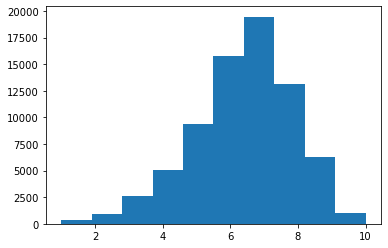

In [87]:
#Create a histogram
plt.hist(df['averagerating'])
plt.show()

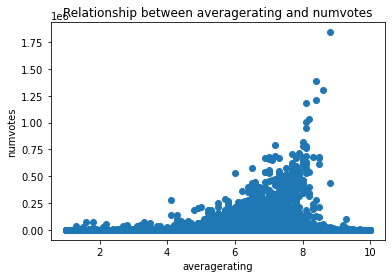

In [89]:
fig, ax=plt.subplots(figsize=(6,4))
ax.scatter(df['averagerating'],df['numvotes'])
ax.set_xlabel('averagerating')
ax.set_ylabel('numvotes')
ax.set_title('Relationship between averagerating and numvotes')
plt.show;

The scatter plot shows that there is a positive correlation between averagerating and numvotes. As the averagerating increases, the numvotes increases.

In [90]:
df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


The average rating and number of votes are positively correlated, meaning that as the average rating increases, the number of votes also increases. This is likely because higher rated movies tend to be more popular and thus have more votes.